# HW_7.0

In [3]:
pip install surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811598 sha256=98833dc6e7c6cf26378cc9a62b996e51ca15a22db3bc51c75ff6b08ee41eb482
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [4]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader
from surprise import SVDpp, SVD, NMF
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from surprise import accuracy


data = Dataset.load_builtin('ml-100k')
data


Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [5]:
# Run 5-fold cross-validation SVD and print results.
cvd_results = cross_validate(SVD(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("Mean RMSE: {:.4f}".format(np.mean(cvd_results['test_rmse'])))
print("Mean MAE: {:.4f}".format(np.mean(cvd_results['test_mae'])))
print("Mean fit time: {:.4f}".format(np.mean(cvd_results['fit_time'])))
print("Mean test time: {:.4f}".format(np.mean(cvd_results['test_time'])))


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9245  0.9369  0.9331  0.9416  0.9378  0.9348  0.0058  
MAE (testset)     0.7314  0.7406  0.7362  0.7380  0.7386  0.7369  0.0031  
Fit time          1.32    2.01    1.35    1.34    1.33    1.47    0.27    
Test time         0.14    0.34    0.12    0.21    0.13    0.19    0.08    
Mean RMSE: 0.9348
Mean MAE: 0.7369
Mean fit time: 1.4713
Mean test time: 0.1868


In [6]:
# Run 5-fold cross-validation SVDpp and print results.
cvdpp_results = cross_validate(SVDpp(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("Mean RMSE: {:.4f}".format(np.mean(cvdpp_results['test_rmse'])))
print("Mean MAE: {:.4f}".format(np.mean(cvdpp_results['test_mae'])))
print("Mean fit time: {:.4f}".format(np.mean(cvdpp_results['fit_time'])))
print("Mean test time: {:.4f}".format(np.mean(cvdpp_results['test_time'])))

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9191  0.9218  0.9246  0.9193  0.9127  0.9195  0.0039  
MAE (testset)     0.7214  0.7236  0.7223  0.7215  0.7160  0.7210  0.0026  
Fit time          27.64   26.30   26.27   26.49   26.06   26.55   0.56    
Test time         5.23    4.18    4.47    4.08    4.05    4.40    0.44    
Mean RMSE: 0.9195
Mean MAE: 0.7210
Mean fit time: 26.5537
Mean test time: 4.3991


In [7]:
# Run 5-fold cross-validation NMF and print results.
nmf_results = cross_validate(NMF(), data, measures=['rmse', 'mae'], cv=5, verbose=True)

print("Mean RMSE: {:.4f}".format(np.mean(nmf_results['test_rmse'])))
print("Mean MAE: {:.4f}".format(np.mean(nmf_results['test_mae'])))
print("Mean fit time: {:.4f}".format(np.mean(nmf_results['fit_time'])))
print("Mean test time: {:.4f}".format(np.mean(nmf_results['test_time'])))

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9689  0.9639  0.9507  0.9653  0.9589  0.9616  0.0063  
MAE (testset)     0.7615  0.7570  0.7485  0.7610  0.7520  0.7560  0.0051  
Fit time          2.84    2.08    2.08    2.08    2.11    2.24    0.30    
Test time         0.10    0.11    0.12    0.11    0.14    0.12    0.01    
Mean RMSE: 0.9616
Mean MAE: 0.7560
Mean fit time: 2.2380
Mean test time: 0.1174


In [8]:
rmse_results = {
    'SVD': np.mean(cvd_results['test_rmse']),
    'SVD++': np.mean(cvdpp_results['test_rmse']),
    'NMF': np.mean(nmf_results['test_rmse'])
}

# Визначення алгоритму з найменшим RMSE
best_algorithm = min(rmse_results, key=rmse_results.get)

print(f"Найкращий алгоритм: {best_algorithm} з RMSE = {rmse_results[best_algorithm]:.4f}")


Найкращий алгоритм: SVD++ з RMSE = 0.9195


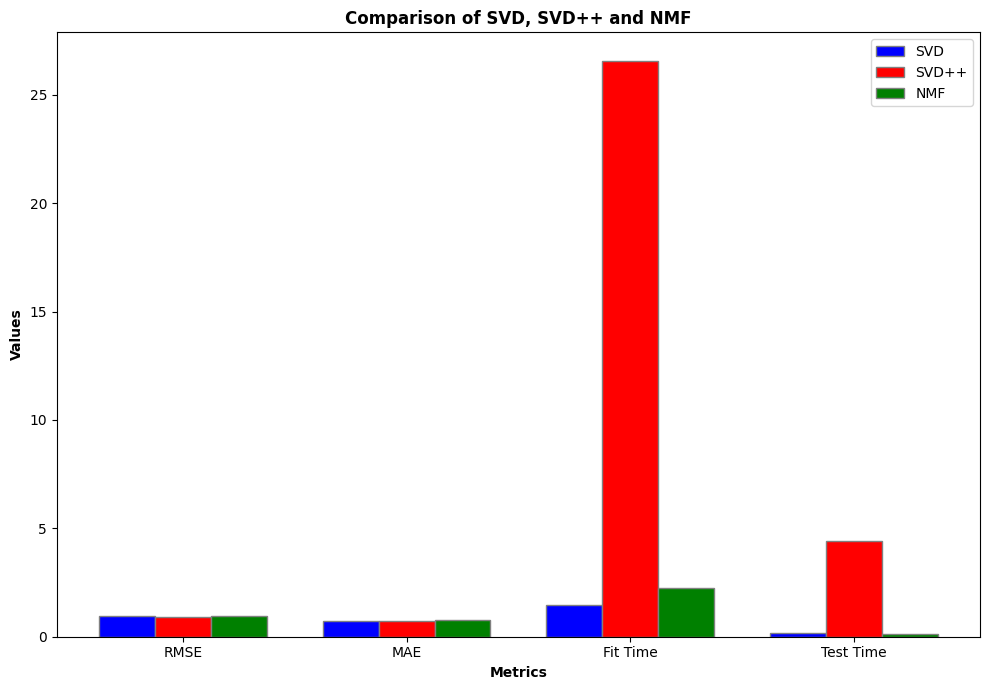

In [9]:
import matplotlib.pyplot as plt

metrics = ['RMSE', 'MAE', 'Fit Time', 'Test Time']
values_svd = [np.mean(cvd_results['test_rmse']),
              np.mean(cvd_results['test_mae']),
              np.mean(cvd_results['fit_time']),
              np.mean(cvd_results['test_time'])]

values_svdpp = [np.mean(cvdpp_results['test_rmse']),
                np.mean(cvdpp_results['test_mae']),
                np.mean(cvdpp_results['fit_time']),
                np.mean(cvdpp_results['test_time'])]

values_nmf = [np.mean(nmf_results['test_rmse']),
              np.mean(nmf_results['test_mae']),
              np.mean(nmf_results['fit_time']),
              np.mean(nmf_results['test_time'])]

bar_width = 0.25
r1 = np.arange(len(values_svd))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10,7))
plt.bar(r1, values_svd, width=bar_width, color='blue', edgecolor='grey', label='SVD')
plt.bar(r2, values_svdpp, width=bar_width, color='red', edgecolor='grey', label='SVD++')
plt.bar(r3, values_nmf, width=bar_width, color='green', edgecolor='grey', label='NMF')

plt.title('Comparison of SVD, SVD++ and NMF', fontweight='bold')
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(values_svd))], metrics)
plt.legend()

plt.tight_layout()
plt.show()


SVD++ маює найнижчі значення RMSE та MAE, але він найбільш витратний по часу виконання.